This notebook can be used if there are too many files to load in memory at once. You can specify a batch size in config.py: make sure that all files in one batch fit into memory.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

from UKMovementSensing import hsmm

import pandas as pd
import numpy as np

In [3]:
execfile('config.py')

## Define the files to use

In [4]:
filenames = os.listdir(train_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(train_path,fn))]
filenames = [os.path.join(train_path,filename) for filename in filenames]

## Train HSMM

/home/vincent/anaconda3/envs/ukmose/lib/python2.7/site-packages/pybasicbayes/util/stats.py:185: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = np.random.randn(nu,n)


Nr of batches: 23


/home/vincent/anaconda3/envs/ukmose/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:895: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))


0
Resampled all sequences in 1333.9 seconds
Convergence: average Hamming distance is 0.972152191484
1
Resampled all sequences in 1196.4 seconds
Convergence: average Hamming distance is 0.429046184251
2
Resampled all sequences in 1158.2 seconds
Convergence: average Hamming distance is 0.313698733584
3
Resampled all sequences in 1127.4 seconds
Convergence: average Hamming distance is 0.227023734534
4
Resampled all sequences in 1105.2 seconds
Convergence: average Hamming distance is 0.168108141693
5
Resampled all sequences in 1094.4 seconds
Convergence: average Hamming distance is 0.122495995911
6
Resampled all sequences in 1087.8 seconds
Convergence: average Hamming distance is 0.0986233292186
7
Resampled all sequences in 1127.3 seconds
Convergence: average Hamming distance is 0.086782861192
8
Resampled all sequences in 1088.7 seconds
Convergence: average Hamming distance is 0.0836273667055
9
Resampled all sequences in 1095.8 seconds
Convergence: average Hamming distance is 0.07905388435

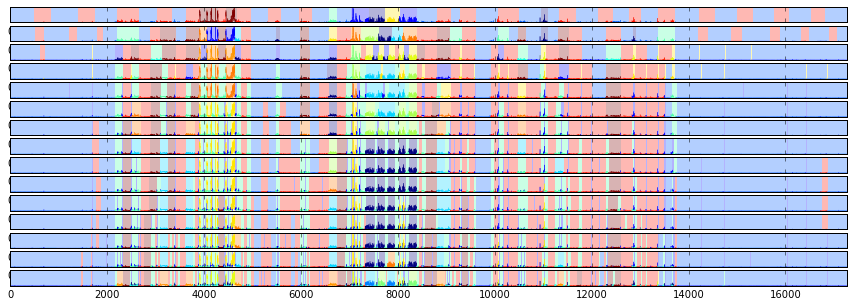

In [5]:
#Note that with many iterations, the visualization becomes badly visible
model = hsmm.train_hsmm_all(filenames, column_names, batchsize=batch_size, Nmax=Nmax, nr_resamples=nr_resamples, 
                            trunc=truncate, visualize=True)

In [6]:
states_path

'/media/windows-share/London/data_13012017/run_20170307/datawithstates/model_10states_10batch_15resamples_720truncate.pkl'

## Save the data with the states

Get the state sequence for each datafile, and save the data including the states found. This labeled data serves as an input to the analyses.

In [7]:
for filename in filenames:
    dat = pd.read_csv(filename)
    X = dat[column_names].as_matrix()
    prediction = model.predict(X, 0)
    dat['state'] = prediction[1]
    fn_out = str(str(dat['subset'][0]) + dat['filename'][0])+'.csv'
    print("saving "+fn_out)
    dat.to_csv(os.path.join(states_path, fn_out))

saving 0__022783_2015-03-18 14-22-46.bin_day1.csv
saving 0__022783_2015-03-18 14-22-46.bin_day2.csv
saving 0__022800_2015-04-08 11-03-39.bin_day1.csv
saving 0__022819_2015-03-17 11-21-07.bin_day1.csv
saving 0__022819_2015-03-17 11-21-07.bin_day2.csv
saving 0__022868_2015-03-11 14-06-20.bin_day1.csv
saving 0__022868_2015-03-11 14-06-20.bin_day2.csv
saving 0__022893_2015-03-20 14-33-30.bin_day1.csv
saving 0__022893_2015-03-20 14-33-30.bin_day2.csv
saving 0__022912_2015-04-14 11-46-45.bin_day1.csv
saving 0__022912_2015-04-14 11-46-45.bin_day2.csv
saving 0__022934_2015-03-06 10-31-40.bin_day1.csv
saving 0__022950_2015-03-12 15-57-38.bin_day1.csv
saving 0__022950_2015-03-12 15-57-38.bin_day2.csv
saving 0__022957_2015-03-11 12-31-53.bin_day1.csv
saving 0__022957_2015-03-11 12-31-53.bin_day2.csv
saving 0__022974_2015-03-04 11-02-20.bin_day1.csv
saving 0__022974_2015-03-04 11-02-20.bin_day2.csv
saving 0__022996_2015-03-19 12-06-23.bin_day2.csv
saving 0__023011_2015-03-24 09-55-17.bin_day1.csv


## Save the model

In [8]:
import pickle
#Remove the data from the model
model.states_list = []

with open(model_file, 'wb') as f:
    pickle.dump(model, file=f)

## Save the config

In [5]:
from shutil import copyfile

copyfile('config.py', config_file)